In [6]:
import cv2
import numpy as np
from cnn import build_CNN

In [7]:
heatmodel = build_CNN(input_shape=(None,None,3), filename="wally.h5")

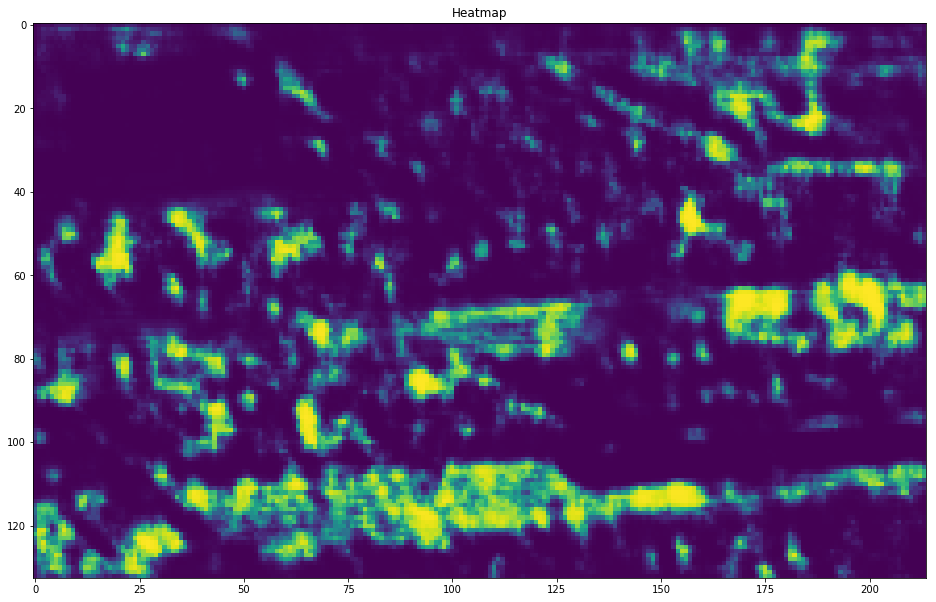

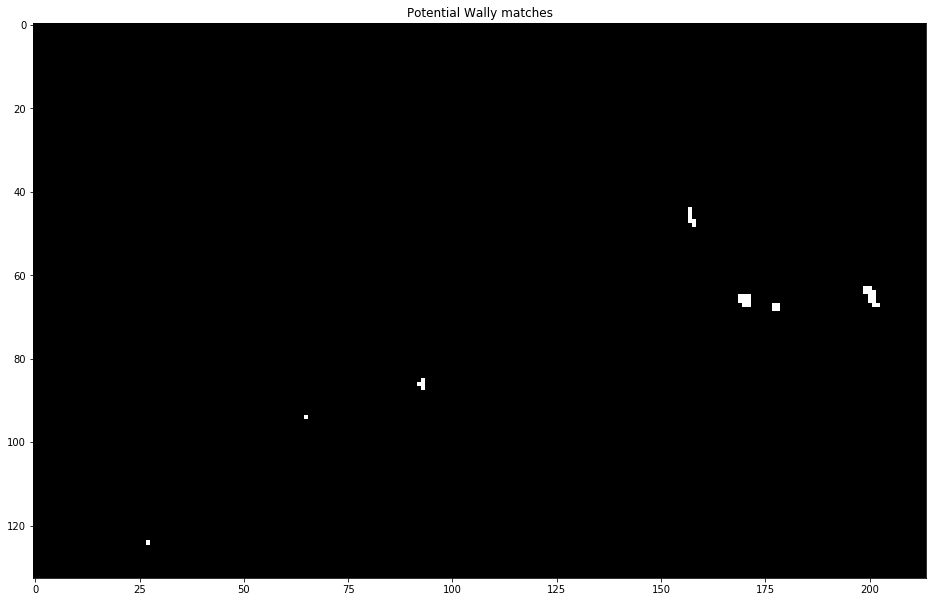

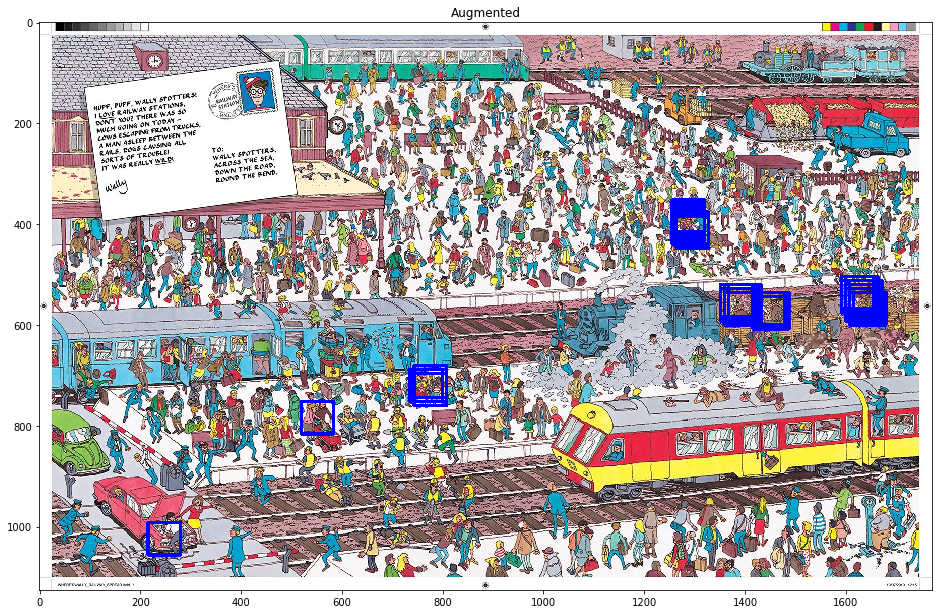

In [8]:
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [16,18]

def locate():
    data = cv2.cvtColor(cv2.imread("test2.jpg"), cv2.COLOR_BGR2RGB)
    
    heatmap = heatmodel.predict(data.reshape(1,data.shape[0],data.shape[1],data.shape[2]))
    
    plt.imshow(heatmap[0,:,:,0])
    plt.title("Heatmap")
    plt.show()
    plt.imshow(heatmap[0,:,:,0]>0.99, cmap="gray")
    plt.title("Potential Wally matches")
    plt.show()

    xx, yy = np.meshgrid(np.arange(heatmap.shape[2]),np.arange(heatmap.shape[1]))
    x = (xx[heatmap[0,:,:,0]>0.99])
    y = (yy[heatmap[0,:,:,0]>0.99])
    
    for i,j in zip(x,y):
        cv2.rectangle(data, (i*8,j*8), (i*8+64,j*8+64), (0,0,255), 5)
    return data

annotated = locate()

plt.title("Augmented")    
plt.imshow(annotated)
plt.show()